# Satellite Image Analysis: Image Manipulation

[RasterIO](https://rasterio.readthedocs.io/en/stable/) is used along with [EarthPy](https://earthpy.readthedocs.io/en/latest/index.html) to load an process the TIFF images separated in different bands.

Note that EarthPy has [example datasets](https://earthpy.readthedocs.io/en/latest/earthpy-data-subsets.html).

#### Table of Contents

1. Imports
2. Convert TIFF to MAT

## 1. Imports

In [6]:
from glob import glob
import numpy as np
from scipy.io import loadmat
from scipy.io import savemat
import rasterio as rio

## 2. Convert TIFF to MAT

In [2]:
DATA_PATH = "../data/Satellite_Imagery/"

In [3]:
filename = "sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_Scene_classification_map.tiff"

In [4]:
with rio.open(DATA_PATH+filename, 'r') as f:
    data = f.read(1)
print(f"Size: {data.shape}")

Size: (954, 298)


In [5]:
savemat(file_name='classification_map.mat', mdict={"classification_map": data})

In [9]:
path = DATA_PATH+'sundarbans_data/'
sentinel_bands = glob(f"{path}*B?*.tiff")
sentinel_bands.sort()

In [10]:
sentinel_bands

['../data/Satellite_Imagery/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
 '../data/Satellite_Imagery/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
 '../data/Satellite_Imagery/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
 '../data/Satellite_Imagery/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
 '../data/Satellite_Imagery/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
 '../data/Satellite_Imagery/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
 '../data/Satellite_Imagery/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
 '../data/Satellite_Imagery/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
 '../data/Satellite_Imagery/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B09_(Raw).tiff',
 '../data/

In [11]:
# Open rasters with Rasterio
images = []
for i in sentinel_bands:
    with rio.open(i, 'r') as f:
        images.append(f.read(1))

In [13]:
# Data
images_array = np.stack(images)
images_array = np.moveaxis(images_array, 0, -1)

In [15]:
savemat(file_name='sundarbans_bands.mat', mdict={"data": images_array})

In [16]:
print(images_array.shape)

(954, 298, 12)


## 3. Visualize

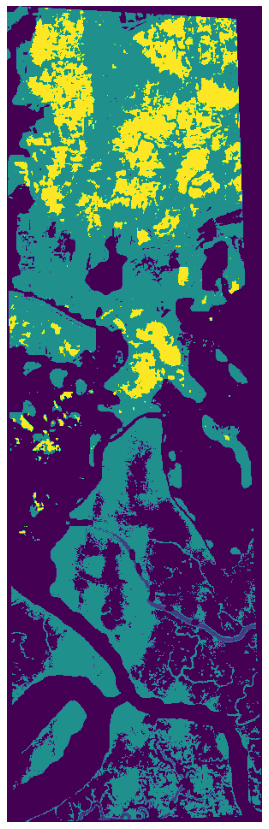

In [17]:
import matplotlib.pyplot as plt

with rio.open(DATA_PATH+filename, 'r') as f:
    gt = f.read(1)

plt.figure(figsize = (20,15))
plt.imshow(gt)
plt.axis('off')
plt.show()